# Basic Demo of Schelling Agent Based Model

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from model import SchellingModel

import holoviews as hv
import numpy as np
hv.notebook_extension()

In [6]:
# Initialize the ABM model
model = SchellingModel(width=5, height=5, threshold=3, population_density=0.8, population_breakdown=0.2)

# Model Arguments
# width:     Width  of the grid containing agents.
# height:    Height of the grid containing agents.
# threshold: Homophily threshold, the number, from 0-8, of nearest neighbours at which I am so unhappy that I move.
# population_density:   Proportion of cells occupied, from 0-1.
# population_breakdown: Proportion of agents of type 1, from 0-1.

In [8]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps)

100


In [11]:
model_out = model.datacollector.get_model_vars_dataframe()
model_out.head()

happy
0     17
1     17
2     17
3     18
4     17

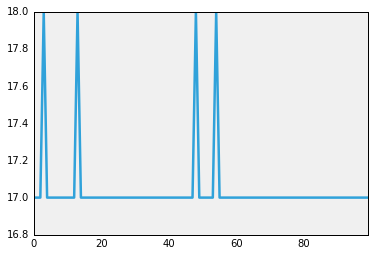

In [13]:
model_out.happy.plot()

In [14]:
agent_out = model.datacollector.get_agent_vars_dataframe()
agent_out.head()

y  x
Step AgentID      
0    (0, 0)   4  1
     (0, 1)   0  2
     (0, 2)   0  4
     (0, 3)   2  1
     (1, 0)   3  0

# Basic Demo of HoloViews

In [2]:
def sine(x, phase=0, freq=100):
    return np.sin((freq * x + phase))
phases = np.linspace(0,2*np.pi,11) # Explored phases
freqs = np.linspace(50,150,5)      # Explored frequencies
dist = np.linspace(-0.5,0.5,202)   # Linear spatial sampling
x,y = np.meshgrid(dist, dist)
grid = (x**2+y**2)                 # 2D spatial sampling

In [3]:
dimensions = ['Phase', 'Frequency']
keys = [(p,f) for p in phases for f in freqs]

b':HoloMap   [Phase,Frequency]\n   :Image   [x,y]   (Amplitude)'
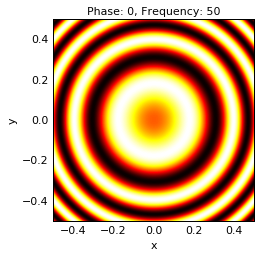
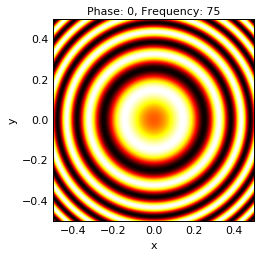
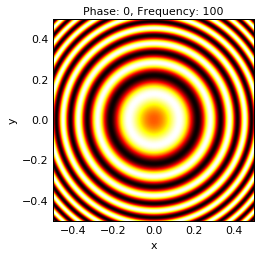
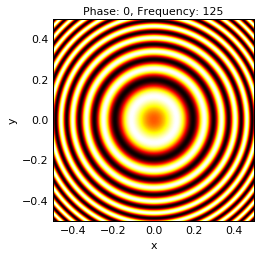
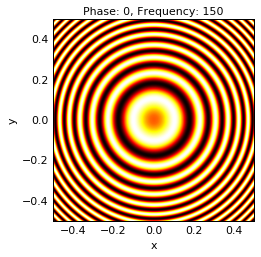
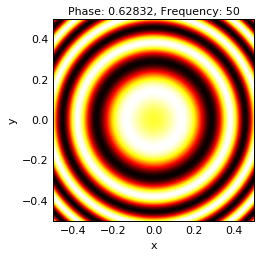
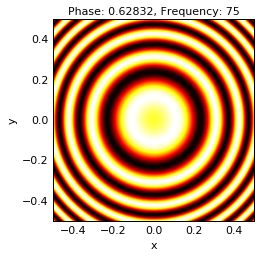
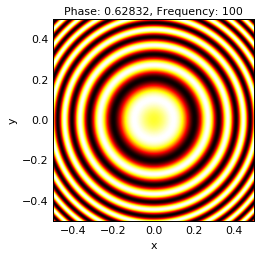
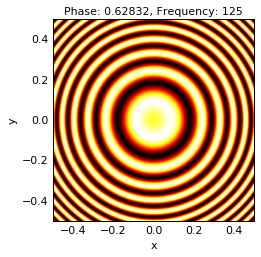
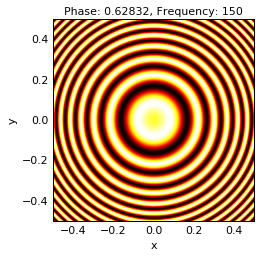
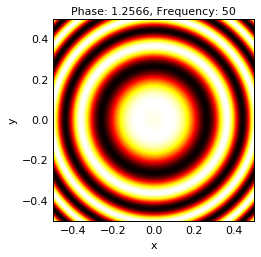
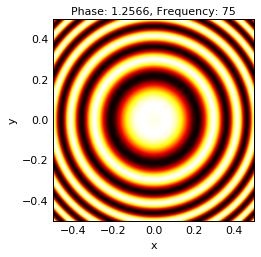
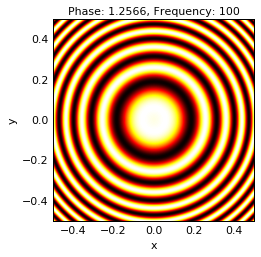
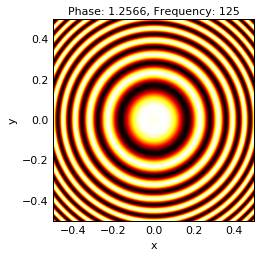
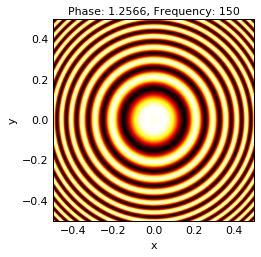
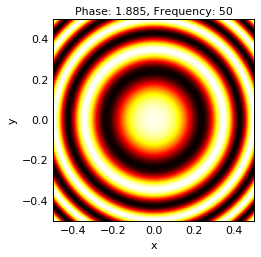
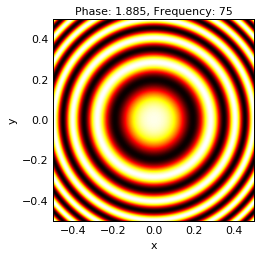
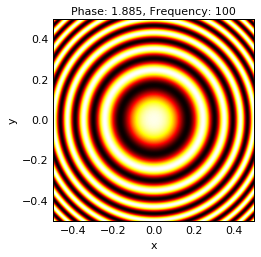
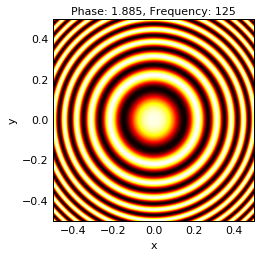
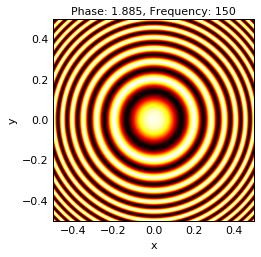
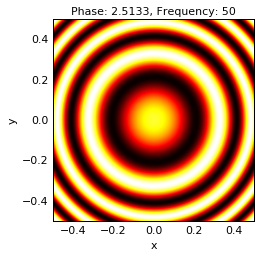
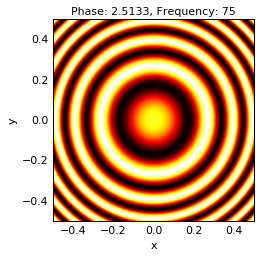
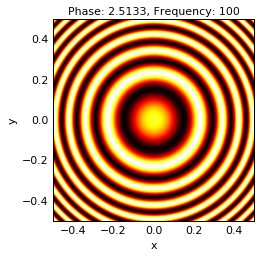
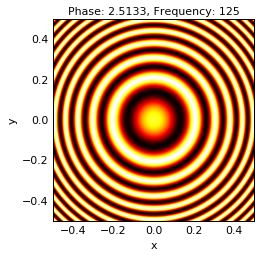
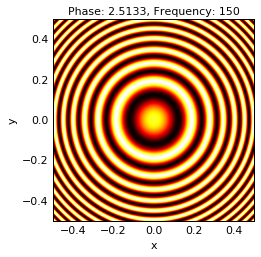
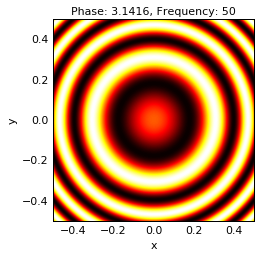
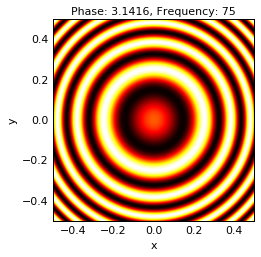
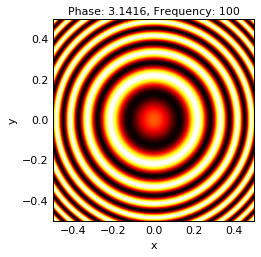
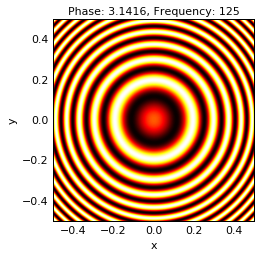
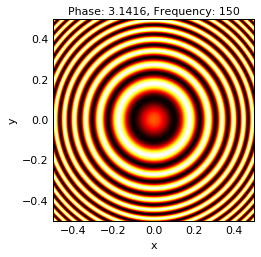
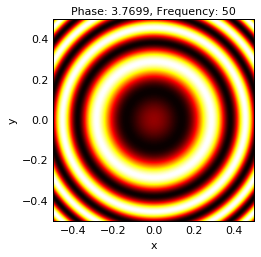
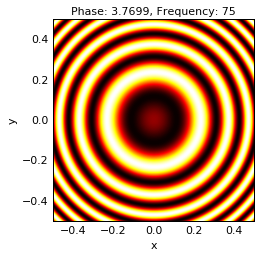
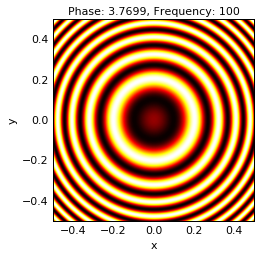
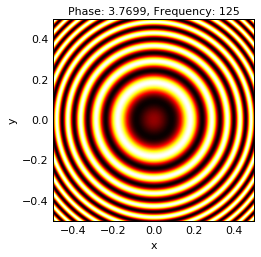
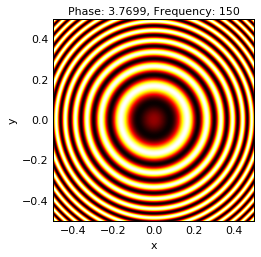
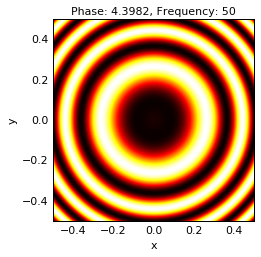
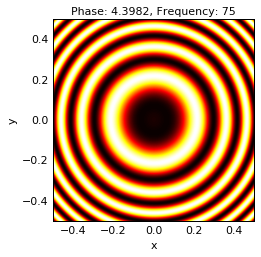
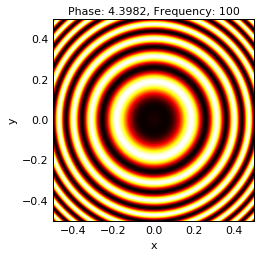
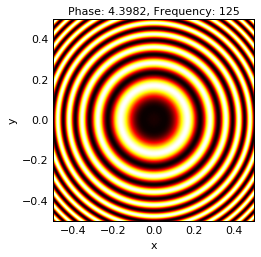
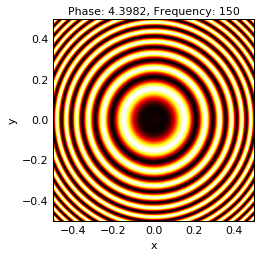
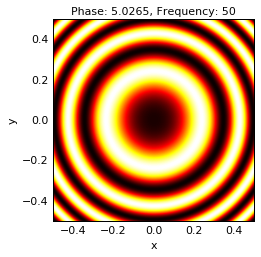
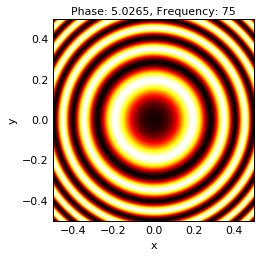
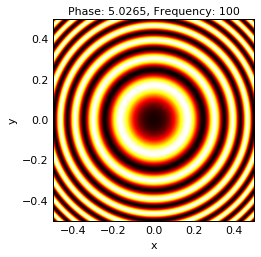
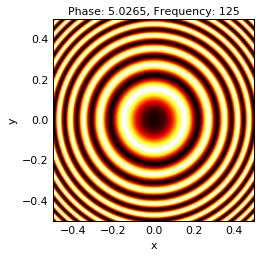
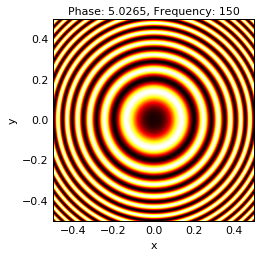
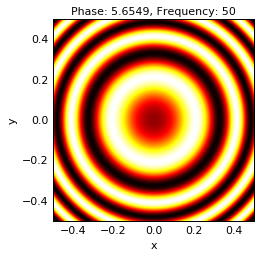
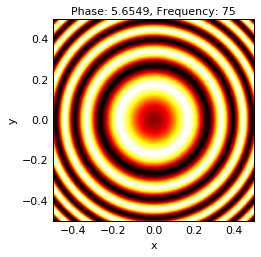
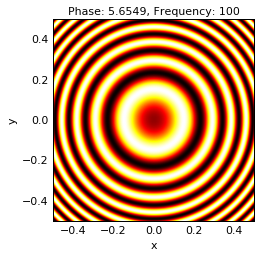
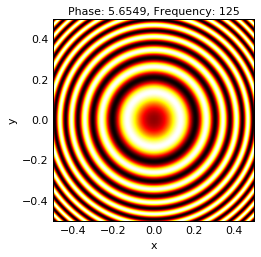
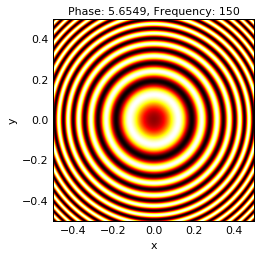
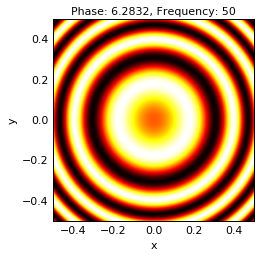
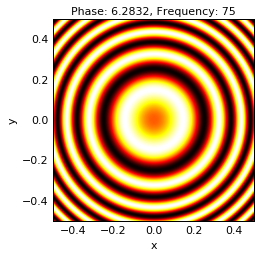
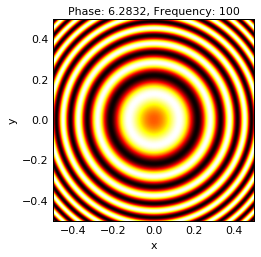
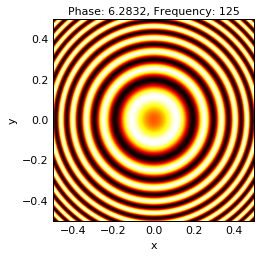
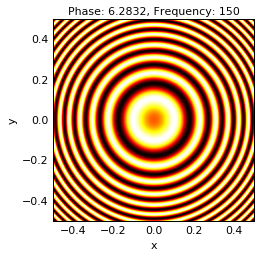

In [4]:
items = [(k, hv.Image(sine(grid, *k), vdims=['Amplitude'])) for k in keys]
circular_wave = hv.HoloMap(items, kdims=dimensions)
circular_wave